In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 读入汇率数据 `exchange-2016-2018.csv`

In [3]:
exchange = pd.read_csv('exchange-2016-2018.csv')
exchange.head()

,date,us_yuan,aud_yuan,euro_yuan,pound_yuan,yen_yuan
0,2016/1/4,6.53,4.694,7.075,9.603,0.055
1,2016/1/5,6.52,4.670,7.011,9.588,0.055
2,2016/1/6,6.56,4.639,7.069,9.577,0.055
3,2016/1/7,6.59,4.621,7.202,9.620,0.056
4,2016/1/8,6.59,4.583,7.194,9.551,0.056


In [4]:
exchange.date.dtype

dtype('O')

### 将date列解析为时间格式，并作为索引

In [5]:
# exchange = pd.read_csv('exchange-2016-2018.csv', parse_dates=[0], index_col=0)
exchange2 = exchange.set_index('date')
exchange2.index = pd.to_datetime(exchange2.index)
print(exchange2.index.dtype)
exchange2.head()

datetime64[ns]


,us_yuan,aud_yuan,euro_yuan,pound_yuan,yen_yuan
date,,,,,
2016-01-04,6.53,4.694,7.075,9.603,0.055
2016-01-05,6.52,4.670,7.011,9.588,0.055
2016-01-06,6.56,4.639,7.069,9.577,0.055
2016-01-07,6.59,4.621,7.202,9.620,0.056
2016-01-08,6.59,4.583,7.194,9.551,0.056


### 统计每月各汇率开盘价、最高、最低和平均价

In [6]:
x = exchange2.resample('MS')
# x.agg(['min', 'mean', 'max'])
def open_price(x):
    return x[0]
aggregated = x.agg([np.min, np.max, np.mean, open_price])
aggregated.head()

us_yuan                            aud_yuan                   \
              amin  amax      mean open_price     amin   amax      mean   
date                                                                      
2016-01-01   6.520  6.59  6.572632      6.530    4.516  4.694  4.605474   
2016-02-01   6.520  6.58  6.550500      6.580    4.631  4.725  4.676600   
2016-03-01   6.450  6.55  6.502609      6.550    4.699  4.966  4.883000   
2016-04-01   6.460  6.50  6.475238      6.480    4.850  5.047  4.962524   
2016-05-01   6.517  6.58  6.547545      6.518    4.709  4.774  4.734818   

                      euro_yuan                             pound_yuan         \
           open_price      amin   amax      mean open_price       amin   amax   
date                                                                            
2016-01-01      4.694     7.011  7.202  7.141579      7.075      9.347  9.620   
2016-02-01      4.680     7.120  7.441  7.272750      7.168      9.082  9.606   
2016-03-01      4.699     7.120  7.348  7.244652      7.120      9.110  9.377   
2016-04-01      4.973     7.295  7.411  7.343667      7.380      9.111  9.474   
2016-05-01      4.751     7.291  7.382  7.335182      7.382      9.392  9.624   

                                yen_yuan                              
                mean open_price     amin   amax      mean open_price  
date                                                                  
2016-01-01  9.466789      9.603    0.054  0.057  0.055684      0.055  
2016-02-01  9.363500      9.481    0.054  0.059  0.057150      0.054  
2016-03-01  9.267652      9.110    0.057  0.058  0.057565      0.057  
2016-04-01  9.271238      9.205    0.058  0.061  0.059048      0.058  
2016-05-01  9.537364      9.392    0.059  0.060  0.059727      0.060

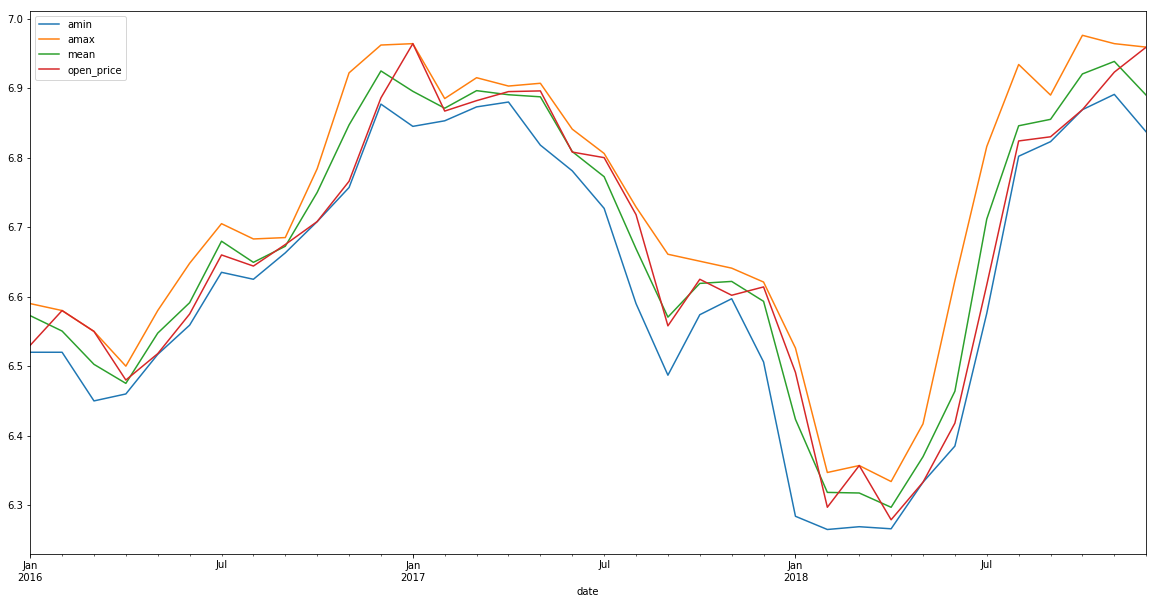

In [12]:
aggregated['us_yuan'].plot(figsize=(20, 10))
plt.show()

In [13]:
ohlc = x.ohlc()
ohlc.head()

us_yuan                    aud_yuan                      euro_yuan  \
              open  high    low close     open   high    low  close      open   
date                                                                            
2016-01-01   6.530  6.59  6.520  6.58    4.694  4.694  4.516  4.660     7.075   
2016-02-01   6.580  6.58  6.520  6.55    4.680  4.725  4.631  4.679     7.168   
2016-03-01   6.550  6.55  6.450  6.45    4.699  4.966  4.699  4.939     7.120   
2016-04-01   6.480  6.50  6.460  6.47    4.973  5.047  4.850  4.920     7.380   
2016-05-01   6.518  6.58  6.517  6.58    4.751  4.774  4.709  4.761     7.382   

                                pound_yuan                      yen_yuan  \
             high    low  close       open   high    low  close     open   
date                                                                       
2016-01-01  7.202  7.011  7.129      9.603  9.620  9.347  9.347    0.055   
2016-02-01  7.441  7.120  7.120      9.481  9.606  9.082  9.110    0.054   
2016-03-01  7.348  7.120  7.338      9.110  9.377  9.110  9.294    0.057   
2016-04-01  7.411  7.295  7.411      9.205  9.474  9.111  9.445    0.058   
2016-05-01  7.382  7.291  7.327      9.392  9.624  9.392  9.564    0.060   

                                 
             high    low  close  
date                             
2016-01-01  0.057  0.054  0.054  
2016-02-01  0.059  0.054  0.058  
2016-03-01  0.058  0.057  0.057  
2016-04-01  0.061  0.058  0.061  
2016-05-01  0.060  0.059  0.059

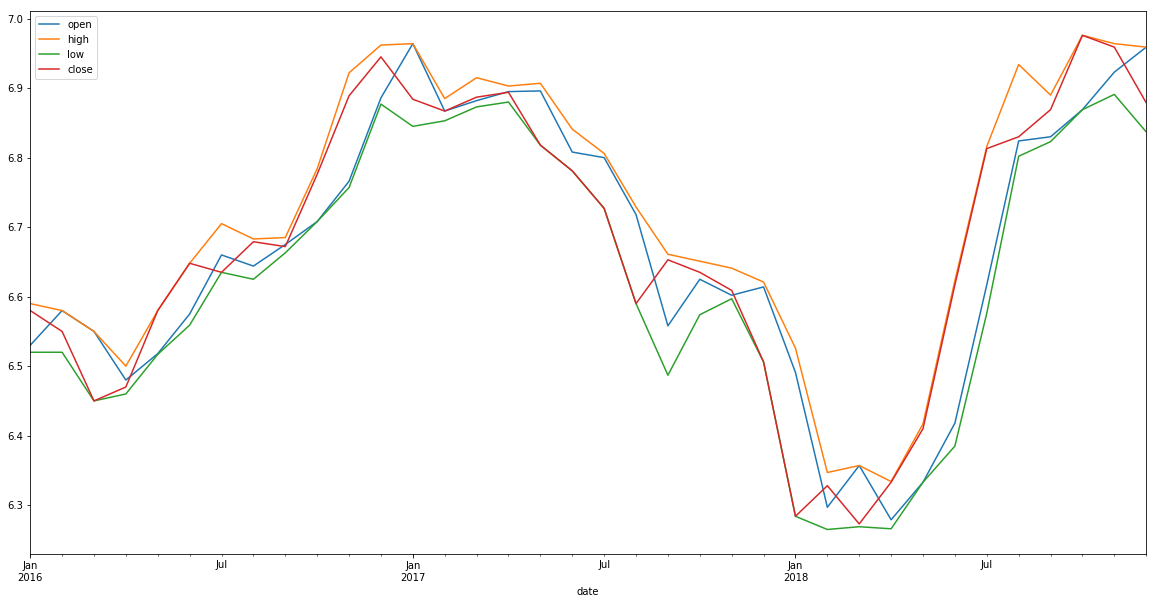

In [14]:
ohlc['us_yuan'].plot(figsize=(20, 10))
plt.show()

### 计算并绘制汇率的5日、10日和30日均线

In [15]:
rolling_means = [exchange2.rolling(str(days) + 'D').mean() for days in (5, 10, 30)]
rolling_means_df = pd.concat(rolling_means, axis=1, keys=['5D', '10D', '30D'])
rolling_means_df.columns = rolling_means_df.columns.swaplevel()
rolling_means_df.head(45)

,us_yuan,aud_yuan,euro_yuan,pound_yuan,yen_yuan,us_yuan,aud_yuan,euro_yuan,pound_yuan,yen_yuan,us_yuan,aud_yuan,euro_yuan,pound_yuan,yen_yuan
,5D,5D,5D,5D,5D,10D,10D,10D,10D,10D,30D,30D,30D,30D,30D
date,,,,,,,,,,,,,,,
2016-01-04,6.530000,4.694000,7.075000,9.603000,0.055000,6.530000,4.694000,7.075000,9.603000,0.055000,6.530000,4.694000,7.075000,9.603000,0.055000
2016-01-05,6.525000,4.682000,7.043000,9.595500,0.055000,6.525000,4.682000,7.043000,9.595500,0.055000,6.525000,4.682000,7.043000,9.595500,0.055000
2016-01-06,6.536667,4.667667,7.051667,9.589333,0.055000,6.536667,4.667667,7.051667,9.589333,0.055000,6.536667,4.667667,7.051667,9.589333,0.055000
2016-01-07,6.550000,4.656000,7.089250,9.597000,0.055250,6.550000,4.656000,7.089250,9.597000,0.055250,6.550000,4.656000,7.089250,9.597000,0.055250
2016-01-08,6.558000,4.641400,7.110200,9.587800,0.055400,6.558000,4.641400,7.110200,9.587800,0.055400,6.558000,4.641400,7.110200,9.587800,0.055400
2016-01-11,6.583333,4.599333,7.176667,9.587333,0.056000,6.560000,4.633500,7.114167,9.588333,0.055500,6.560000,4.633500,7.114167,9.588333,0.055500
2016-01-12,6.576667,4.589333,7.154000,9.536333,0.056000,6.561429,4.627429,7.117000,9.571000,0.055571,6.561429,4.627429,7.117000,9.571000,0.055571
2016-01-13,6.570000,4.584667,7.139000,9.526667,0.056000,6.562500,4.620125,7.121000,9.564875,0.055625,6.562500,4.620125,7.121000,9.564875,0.055625


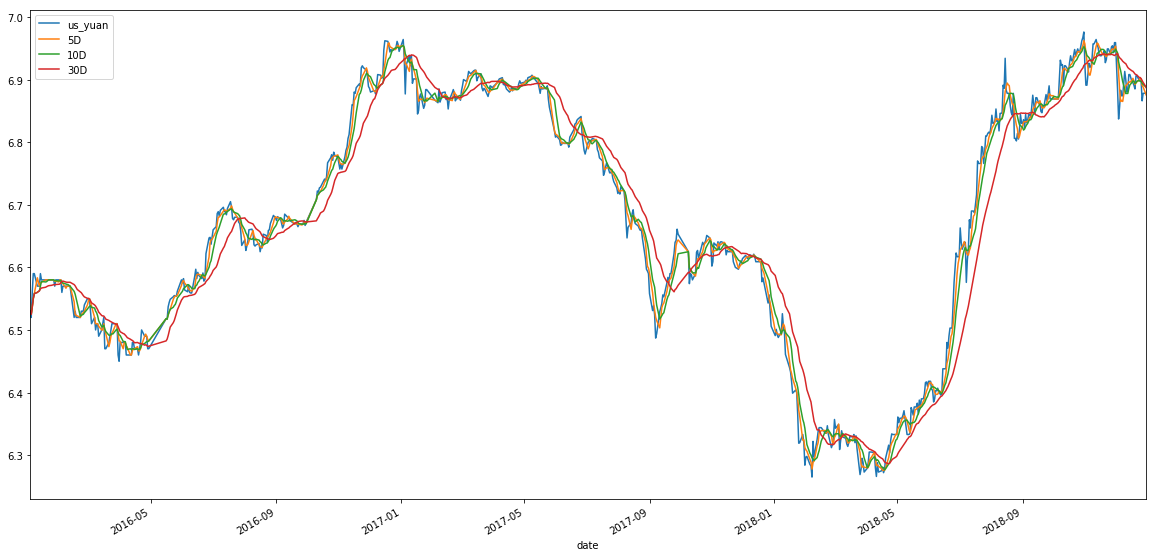

In [16]:
pd.concat([exchange2['us_yuan'], rolling_means_df['us_yuan']], axis=1).plot(figsize=(20, 10))
plt.show()